In [1]:
%matplotlib inline

In [2]:
import fipy as fp

In [3]:
from fipy import numerix as nmx

In [136]:
N = 200
mesh = fp.Grid2D(nx=N, ny=N)

In [137]:
C = fp.CellVariable(mesh=mesh, name="C", hasOld=True)

In [150]:
Calpha = 0.05
Cbeta = 0.95
A = 2.0
B = A / (Calpha - Cm)**2
D = Dalpha = Dbeta = 2 / (Cbeta - Calpha)
kappa = 2.0

In [151]:
Cm = (Calpha + Cbeta) / 2.

In [152]:
f0 = -(A/2)*(C - Cm)**2 + (B/4)*(C - Cm)**4 + (Calpha/4)*(C - Calpha)**4 + (Cbeta/4)*(C - Cbeta)**4

In [153]:
f = f0 + (kappa/2.)*(C.grad.mag)**2
f.name = "f"

In [154]:
Cf = C.arithmeticFaceValue
eq = (fp.TransientTerm(coeff=1.)
      == fp.DiffusionTerm(coeff=D*(-A + 3*B*(Cf - Cm)**2 + 3*Calpha*(Cf - Calpha)**2 + 3*Cbeta*(Cf - Cbeta)**2))
      - fp.DiffusionTerm(coeff=(D,kappa)))

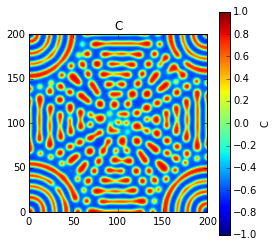

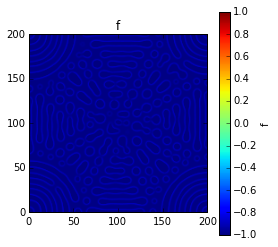

In [162]:
viewer = fp.Viewer(vars=(C, f))

In [163]:
epsilon = 0.01
q = [[nmx.sqrt(2.)], [nmx.sqrt(3.)]]
C.value = 0.45 + epsilon * nmx.cos(nmx.dot(q, mesh.cellCenters))

In [164]:
dexp = -3
elapsed = 0.
duration = 1000.

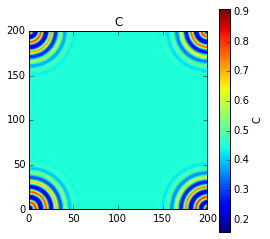

In [ ]:
while elapsed < duration:
    C.updateOld()
    dt = min(100, nmx.exp(dexp))
    elapsed += dt
    # dexp += 0.01
    for sweep in range(1):
        res = eq.sweep(C, dt=dt) #, solver=fp.LinearLUSolver())
        # print res
    viewer.plot()
    print elapsed, min(C), max(C)

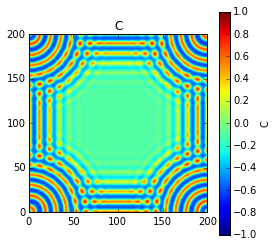

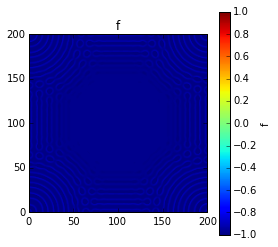

In [160]:
viewer = fp.Viewer(vars=(C, f))

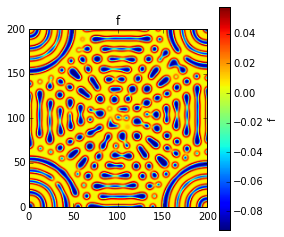

81.7770914017 0.153315084484 0.920923134092


KeyboardInterrupt: 

In [161]:
while elapsed < duration:
    C.updateOld()
    dt = min(100, nmx.exp(dexp))
    elapsed += dt
    dexp += 0.01
    for sweep in range(1):
        res = eq.sweep(C, dt=dt) #, solver=fp.LinearLUSolver())
        # print res
    viewer.plot()
    print elapsed, min(C), max(C)